# Keras tutorial

In [1]:
import random

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from utils import display_samples

## MNIST Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train[0].shape

(28, 28)

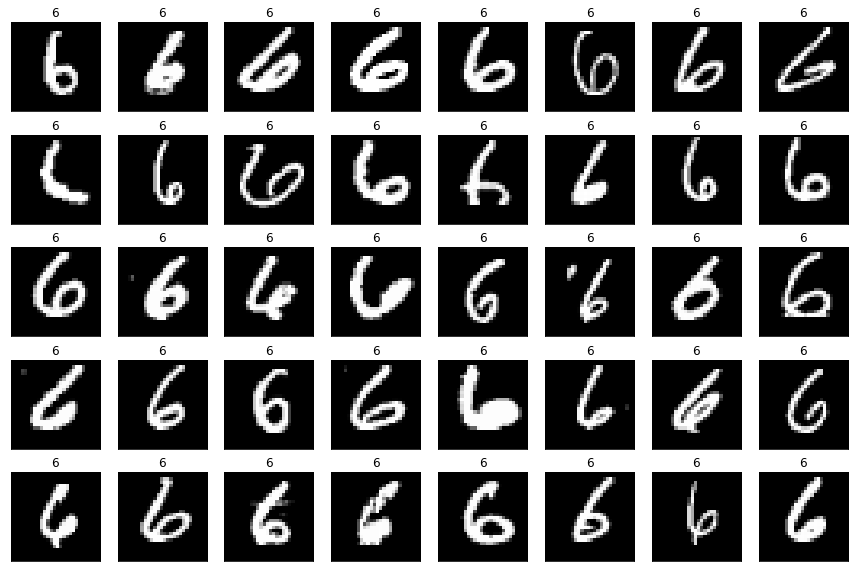

In [5]:
display_samples(x_train, y_train, n_rows=5, n_cols=8, label=6)

## MLP from scratch

### lista di strati passati al costruttore

In [20]:
x_train = x_train / 255

In [27]:
class Model:
    def __init__(self):
        self.W_0 = tf.Variable(initial_value=np.random.normal(size=(784, 100))*1e-3)
        self.b_0 = tf.Variable(initial_value=np.zeros(100))
        self.W_1 = tf.Variable(initial_value=np.random.normal(size=(100, 10))*1e-2)
        self.b_1 = tf.Variable(initial_value=np.zeros(10))
        self.vars = [self.W_0, self.W_1, self.b_0, self.b_1]

    def __call__(self, x):
        x = x.reshape(x.shape[0], -1)
        x_1 = tf.math.maximum(x@self.W_0 + self.b_0, 0)
        x_2 = (x_1@self.W_1 + self.b_1)
        return tf.nn.softmax(x_2, axis=1)

In [31]:
model = Model()
NUM_EPOCHS = 5
N_TRAIN_SET = x_train.shape[0]
BATCH_SIZE = 32
LR = 1e-2
pbar = tqdm(range(NUM_EPOCHS))
for epoch in pbar:
    for i in range(0, N_TRAIN_SET, BATCH_SIZE):
        x_batch = x_train[i:i+BATCH_SIZE]
        with tf.GradientTape() as tape:
            y_prob = model(x_batch)
            losses = tf.keras.losses.categorical_crossentropy(tf.one_hot(y_train[i:i+BATCH_SIZE], 10), y_prob)
            loss = tf.math.reduce_mean(losses)
            grads = tape.gradient(loss, model.vars)
            pbar.set_description(str(loss.numpy().item()))
        for var, grad in zip(model.vars, grads):
            var.assign_sub(grad * LR)

0.12946290073577577: 100%|██████████| 5/5 [01:21<00:00, 16.23s/it]


### predizione

In [38]:
y_prob = model(x=x_test).numpy()

In [39]:
y_hat = np.argmax(y_prob, axis=1)

### accuratezza

In [46]:
np.sum(y_hat == y_test) / y_test.size

0.9161

## esame della predizione

In [40]:
def take_test_samples_idxs(y_prob, y_true, is_correct, most_confident, k):
    y_hat = np.argmax(y_prob, axis=1)
    choosable_idxs = np.nonzero(y_hat == y_true)[0] if is_correct else np.nonzero(y_hat != y_true)[0]
    y_hat_prob = np.amax(y_prob, axis=1)
    sorted_idxs = np.argsort(y_hat_prob)
    if most_confident:
        sorted_idxs = sorted_idxs[::-1]
    return sorted_idxs[np.isin(sorted_idxs, choosable_idxs)][:k]

### predizioni corrette con maggiore confidenza

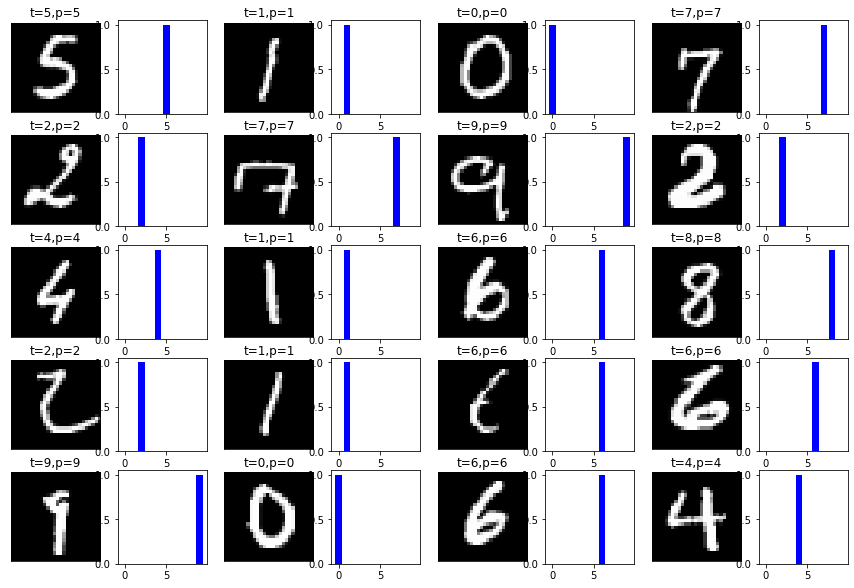

In [41]:
idxs = take_test_samples_idxs(y_prob, y_test, is_correct=True, most_confident=True, k=5*4)
display_samples(x_test[idxs], y_test[idxs], y_hat[idxs], y_prob[idxs], n_rows=5, n_cols=4)

### predizioni corrette con minore confidenza

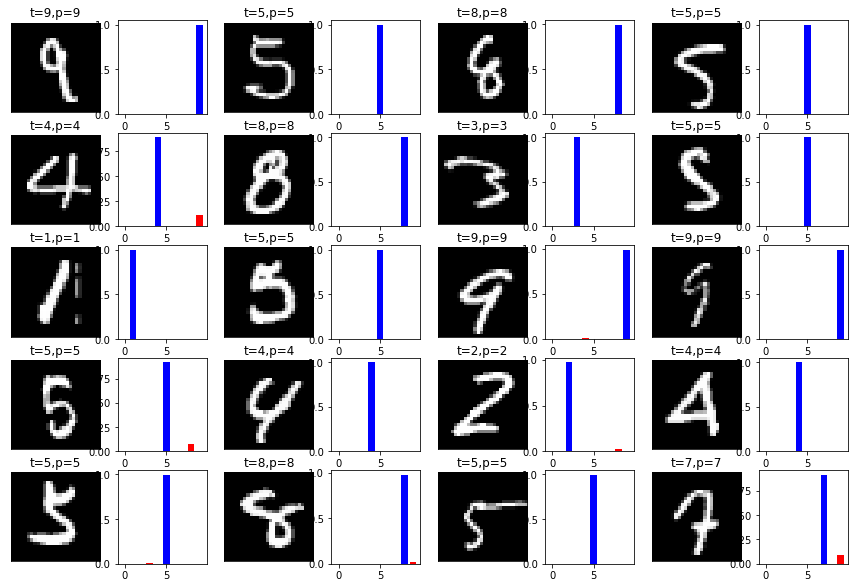

In [42]:
idxs = take_test_samples_idxs(y_prob, y_test, is_correct=True, most_confident=False, k=5*4)
display_samples(x_test[idxs], y_test[idxs], y_hat[idxs], y_prob[idxs], n_rows=5, n_cols=4)

### predizioni errate con maggiore confidenza

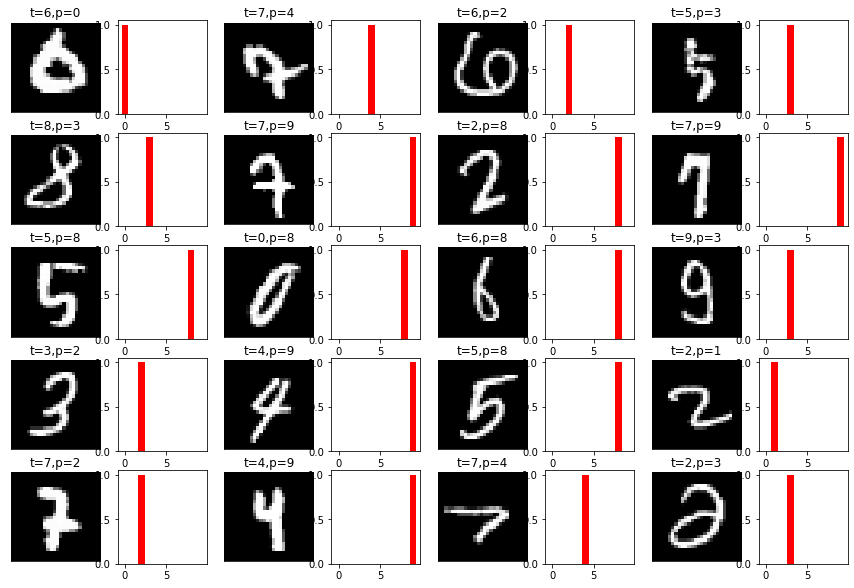

In [43]:
idxs = take_test_samples_idxs(y_prob, y_test, is_correct=False, most_confident=True, k=5*4)
display_samples(x_test[idxs], y_test[idxs], y_hat[idxs], y_prob[idxs], n_rows=5, n_cols=4)

### predizioni errate con minore confidenza

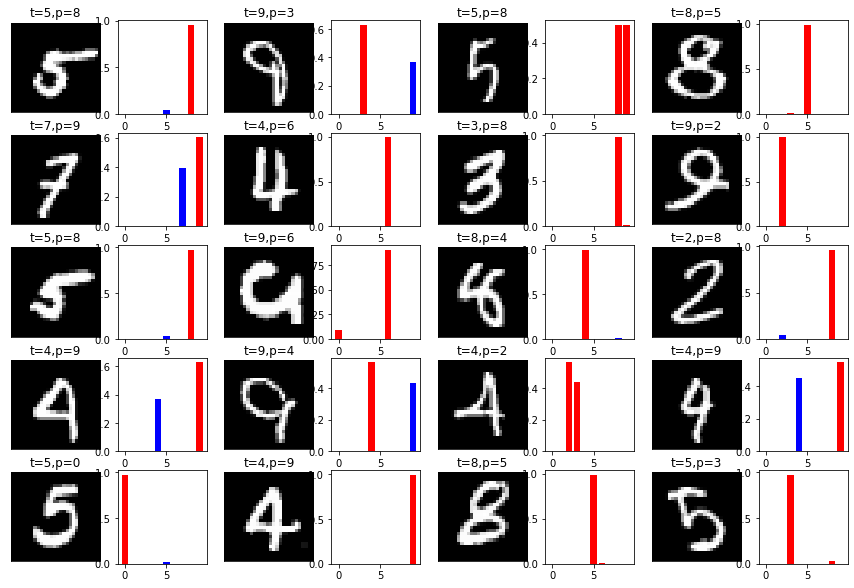

In [44]:
idxs = take_test_samples_idxs(y_prob, y_test, is_correct=False, most_confident=False, k=5*4)
display_samples(x_test[idxs], y_test[idxs], y_hat[idxs], y_prob[idxs], n_rows=5, n_cols=4)